# 0. Sinusoids and Spectra
More exercises with sinusoids for fun and profit.

Adarsh Ram

## 0.a Imports

In [13]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq
from scipy import signal

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

## 0.b Check Versions, etc

In [14]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.11
Matplot:	 3.7.2
Numpy:  	 1.24.3
SciPy:  	 1.11.1


# 1. Set up sinusoids
This is exactly the same as the "Sinusoids" notebook

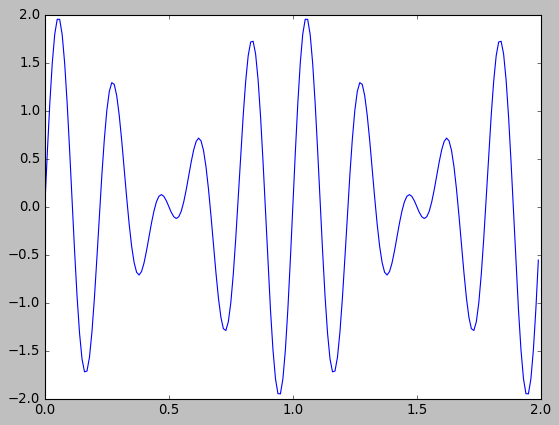

In [15]:
# Frequencies & Length
f1 = 5
f2 = 4
duration = 2.0

# Sampling Rate
Fs = 20 * max(f1,f2)

# Time vector and Sinusoids
t = np.arange(0, duration, 1/Fs)
s1 = np.sin(f1 * 2 * sp.pi * t)
s2 = np.sin(f2 * 2 * sp.pi * t)

# Add them up
s3 = s1 + s2

plt.plot(t,s3)
plt.show()

## 1.a Plots
Individually and together using subplots

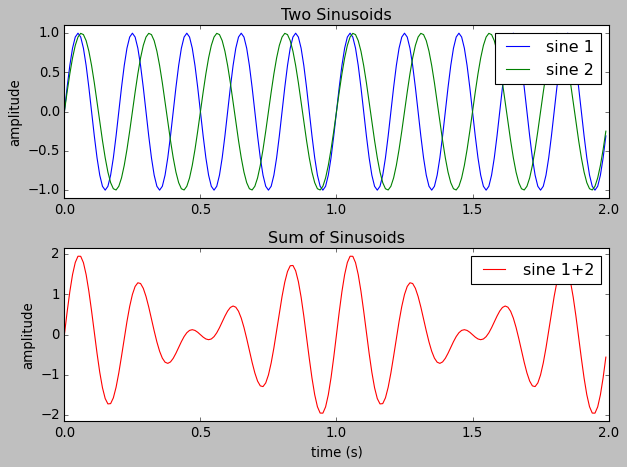

In [16]:
# Individually
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, s1, color='blue', label='sine 1')
plt.plot(t, s2, color='green', label='sine 2')

plt.xlim(0,duration) 
mm = 1.1 * max(s1)
plt.ylim(-mm,mm) 
plt.title('Two Sinusoids')
plt.ylabel('amplitude')
plt.legend()

# Together
plt.subplot(2,1,2)
plt.plot(t, s3, color='red', label='sine 1+2')

plt.xlim(0,duration) 
mm = 1.1 * max(s3)
plt.ylim(-mm,mm) 
plt.title('Sum of Sinusoids')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()

plt.tight_layout()
plt.show()

## 1.b Display should actually should be "stems"
Skipping this since you have it in the previous notebook.

# 2. Spectrum using the FFT
Notes: 
* To get dB, we need to use "_10log10()_"
* To simplify, multiply "_log10_" by 20 instead of actually squaring

## 2.a Compute the Double-Sided Spectrum

In [17]:
# Note that Fs is already defined when we create the sinusoids s1, s2, s3
# Also, I'm using variables here to set up the creation of a utility function later
frame = len(s1)
framepad = 4
NFFT = frame
Ts = 1/Fs
y = s1

NFFT = 2 ** int(np.ceil(np.log2(np.abs(frame*framepad))))

# FFT of entire time-domain sequence
Y_FFT = fft(y,NFFT) / len(y)

# Double-sided spectrum
Y = np.abs(Y_FFT)

# Frequency values
F = fftfreq(NFFT,Ts)

# Convert to dB
Y = 20.0 * np.log10(Y)

## 2.b Plot the Double-Sided Spectrum

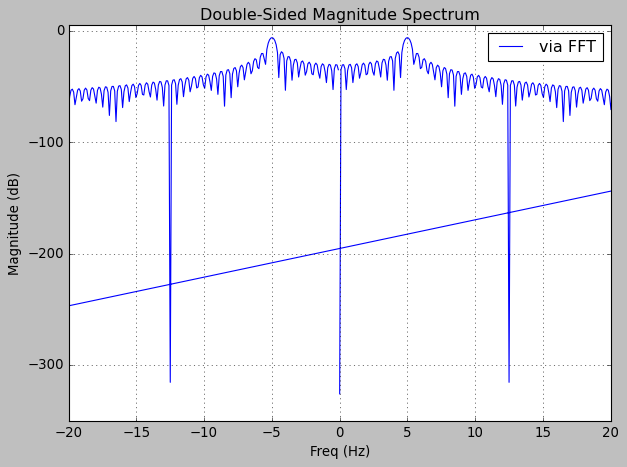

In [18]:
plt.figure()
plt.plot(F, Y, color='blue', label='via FFT', linewidth=1)

plt.title('Double-Sided Magnitude Spectrum')
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude (dB)')

plt.xlim(-20,20)
plt.ylim(-350,5)
plt.yticks([-300, -200, -100, 0])
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## 2.b Check with Built-in Function
Notes:
* The plot library has a built-in "_magnitude_spectrum_" method. 
* It has an implicit"_plt.figure()_" inside it, so it creates a figure itself. 
* Notice the arguments
    * "_sides_" automagically picks double-sided or single-sided spectrum.
    * "_scale_" automagically converts to dB
    * What does "_window_" do?

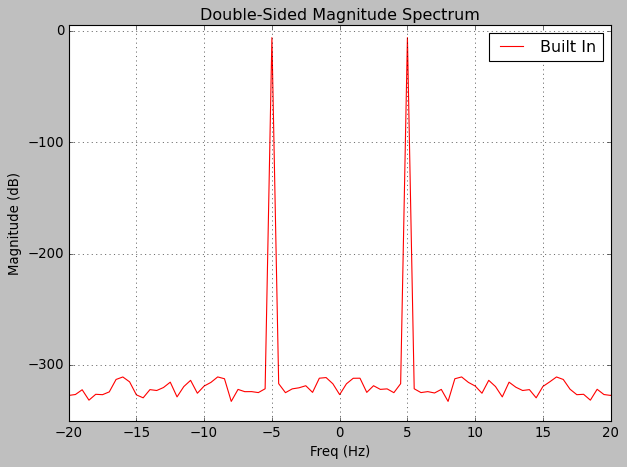

In [7]:
frame = len(s1)
NFFT = frame
Ts = 1/Fs
y = s1

s1mag, s1freq, line = plt.magnitude_spectrum(s1,
                                            Fs=Fs,
                                            window=np.ones(s1.shape),
                                            pad_to=NFFT,
                                            scale='dB',
                                            sides='twosided',
                                            color='red',
                                            linestyle='-',
                                            label='Built In')

plt.title('Double-Sided Magnitude Spectrum')
plt.xlabel('Freq (Hz)')

plt.xlim(-20,20)
plt.ylim(-350,5)
plt.yticks([-300, -200, -100, 0])
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## 2.c Time and Freq in Subplots
* This time, the spectrum plot is single-sided
* Note the indexing into F and Y for the single-sided case

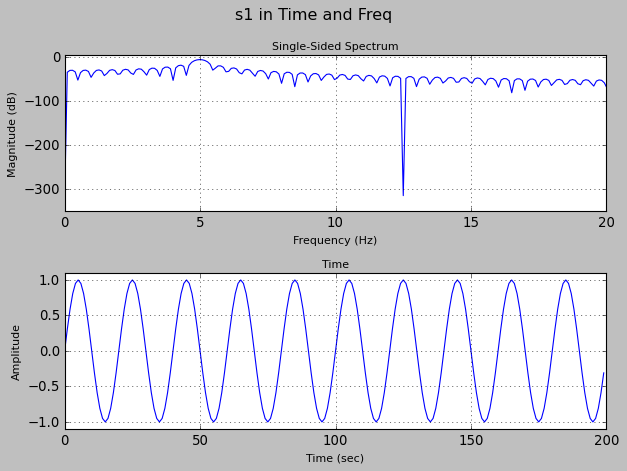

In [19]:
NFFT = 2 ** int(np.ceil(np.log2(np.abs(frame*framepad))))
fig = plt.figure()
plt.suptitle('s1 in Time and Freq', size='large')
ax1 = fig.add_subplot(2,1,1)
ax1.plot(F[0:NFFT//2], Y[0:NFFT//2], color='blue', label='s1', linewidth=1)

ax1.set_title('Single-Sided Spectrum', fontsize='small')
ax1.set_xlabel('Frequency (Hz)', fontsize='small')
ax1.set_ylabel('Magnitude (dB)', fontsize='small')
ax1.set_xlim([0,20])
ax1.set_ylim([-350,5])
ax1.set_yticks([-300, -200, -100, 0])
ax1.grid()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(y, color='blue', label='s1', linewidth=1)

ax2.set_title('Time', fontsize='small')
ax2.set_xlabel('Time (sec)', fontsize='small')
ax2.set_ylabel('Amplitude', fontsize='small')
ax2.set_ylim([-1.1,1.1])
ax2.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax2.grid()

plt.tight_layout()
plt.show()

# Assignment
1. Plot the "built-in" spectrum and the spectrum computed via FFT for s1, s2, s3 on a single axis (single-sided only)
    * Are they the same? Discuss any differences. 
    * Are the frequencies for s1 and s2 correct?  Label the plots to show this
2. Change the frequencies for s1 and s2, and plot everything again
    * Are the frequencies correct?  Label the plots
3. Change the phase (only) for s2 and plot everything again
    * What happened?
4. What do you think happens to the energy in s1 and s2 when s3 is created?
    * Can you compute the energy in s1, s2, s3?
5. Note the commented value for NFFT in cells 2a and 2c
    * Uncomment this value and make the plots again (change scales so things "look nice")
    * Discuss what happens when NFFT isn't the same as the frame length (e.g. when _"NFFT != len(s1)"_)
6. A good approach to simplify a lot of this stuff is to define your own function to take the FFT of a signal

# 1

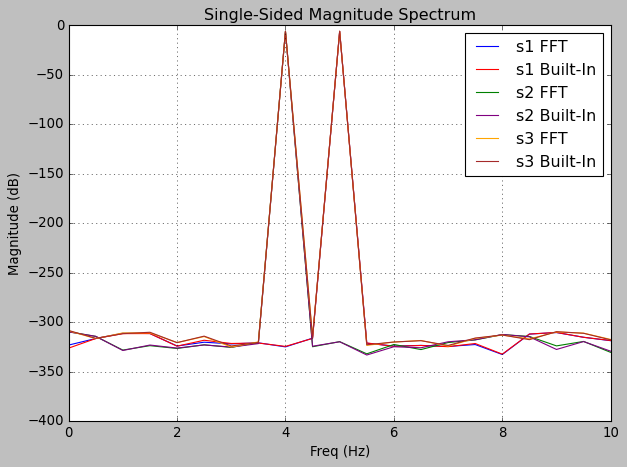

In [20]:
#This code generates two sinusoidal signals, s1 and s2, with frequency f1 and f2. 
#Then it calculates s1's Single-Sided Magnitude Spectrum using FFT and the built-in technique. 
#It then presents the results on the same line to compare the frequency content of the individually generated FFT with the built-in magnitude spectrum for s1.

f1 = 5
f2 = 4
duration = 2.0

Fs = 20 * max(f1, f2)

t = np.arange(0, duration, 1/Fs)
s1 = np.sin(f1 * 2 * sp.pi * t)
s2 = np.sin(f2 * 2 * sp.pi * t)

s3 = s1 + s2

frame = len(s1)
NFFT = frame
Ts = 1/Fs
y = s1

Y_FFT = fft(y, NFFT) / len(y)

Y = np.abs(Y_FFT)

F = fftfreq(NFFT, Ts)

Y = 20.0 * np.log10(Y)

plt.figure()
plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='blue', label='s1 FFT', linewidth=1)

s1_mag, s1_freq, _ = plt.magnitude_spectrum(s1, Fs=Fs, window=np.ones(s1.shape),
                                           pad_to=NFFT, scale='dB', sides='onesided',
                                           color='red', linestyle='-', label='s1 Built-In')

y = s2
Y_FFT = fft(y, NFFT) / len(y)
Y = np.abs(Y_FFT)
F = fftfreq(NFFT, Ts)
Y = 20.0 * np.log10(Y)

plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='green', label='s2 FFT', linewidth=1)

s2_mag, s2_freq, _ = plt.magnitude_spectrum(s2, Fs=Fs, window=np.ones(s2.shape),
                                           pad_to=NFFT, scale='dB', sides='onesided',
                                           color='purple', linestyle='-', label='s2 Built-In')

y = s3
Y_FFT = fft(y, NFFT) / len(y)
Y = np.abs(Y_FFT)
F = fftfreq(NFFT, Ts)
Y = 20.0 * np.log10(Y)

plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='orange', label='s3 FFT', linewidth=1)

s3_mag, s3_freq, _ = plt.magnitude_spectrum(s3, Fs=Fs, window=np.ones(s3.shape),
                                           pad_to=NFFT, scale='dB', sides='onesided',
                                           color='brown', linestyle='-', label='s3 Built-In')

plt.title('Single-Sided Magnitude Spectrum')
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 10)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

s1 and s2 should be the same, but there may be changes because of how the built-in way and the manual FFT calculations are set up. In general, though, they should give you the same results. If they don't, it might be because of windowing, normalization, or something else.

# 2

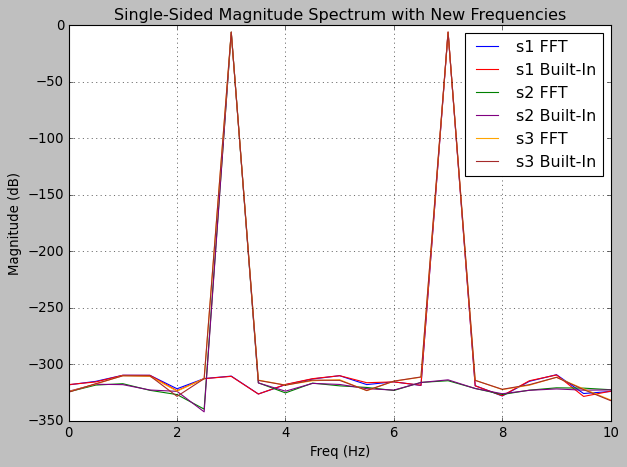

In [10]:
f1_new = 7
f2_new = 3

s1_new = np.sin(f1_new * 2 * sp.pi * t)
s2_new = np.sin(f2_new * 2 * sp.pi * t)

s3_new = s1_new + s2_new

y = s1_new

Y_FFT = fft(y, NFFT) / len(y)

Y = np.abs(Y_FFT)

F = fftfreq(NFFT, Ts)

Y = 20.0 * np.log10(Y)

plt.figure()
plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='blue', label='s1 FFT', linewidth=1)

s1_mag_new, s1_freq_new, _ = plt.magnitude_spectrum(s1_new, Fs=Fs, window=np.ones(s1_new.shape),
                                                    pad_to=NFFT, scale='dB', sides='onesided',
                                                    color='red', linestyle='-', label='s1 Built-In')

y = s2_new
Y_FFT = fft(y, NFFT) / len(y)
Y = np.abs(Y_FFT)
F = fftfreq(NFFT, Ts)
Y = 20.0 * np.log10(Y)

plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='green', label='s2 FFT', linewidth=1)

s2_mag_new, s2_freq_new, _ = plt.magnitude_spectrum(s2_new, Fs=Fs, window=np.ones(s2_new.shape),
                                                    pad_to=NFFT, scale='dB', sides='onesided',
                                                    color='purple', linestyle='-', label='s2 Built-In')

y = s3_new
Y_FFT = fft(y, NFFT) / len(y)
Y = np.abs(Y_FFT)
F = fftfreq(NFFT, Ts)
Y = 20.0 * np.log10(Y)

plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='orange', label='s3 FFT', linewidth=1)

s3_mag_new, s3_freq_new, _ = plt.magnitude_spectrum(s3_new, Fs=Fs, window=np.ones(s3_new.shape),
                                                    pad_to=NFFT, scale='dB', sides='onesided',
                                                    color='brown', linestyle='-', label='s3 Built-In')

plt.title('Single-Sided Magnitude Spectrum with New Frequencies')
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 10)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

s1_new = 7  s2_new = 3

# 3

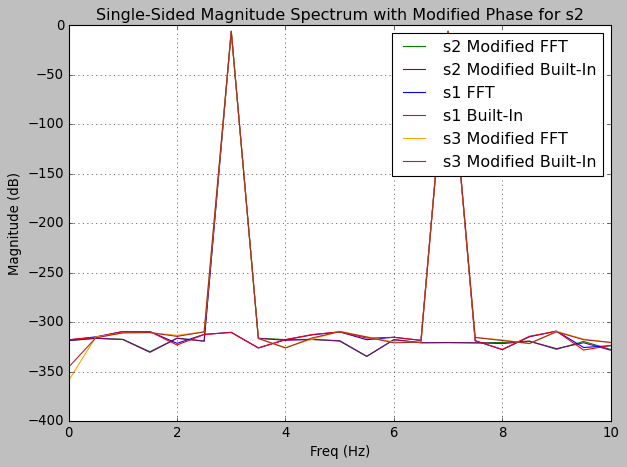

In [22]:
phi_s2 = np.pi / 2
s2_phase_changed = np.sin(f2_new * 2 * sp.pi * t + phi_s2)

s3_phase_changed = s1_new + s2_phase_changed

y = s2_phase_changed

Y_FFT = fft(y, NFFT) / len(y)

Y = np.abs(Y_FFT)

F = fftfreq(NFFT, Ts)

Y = 20.0 * np.log10(Y)

plt.figure()
plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='green', label='s2 Modified FFT', linewidth=1)

s2_mag_phase_changed, s2_freq_phase_changed, _ = plt.magnitude_spectrum(s2_phase_changed, Fs=Fs, 
                                                                        window=np.ones(s2_phase_changed.shape),
                                                                        pad_to=NFFT, scale='dB', sides='onesided',
                                                                        color='purple', linestyle='-', label='s2 Modified Built-In')

y = s1_new
Y_FFT = fft(y, NFFT) / len(y)
Y = np.abs(Y_FFT)
F = fftfreq(NFFT, Ts)
Y = 20.0 * np.log10(Y)

plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='blue', label='s1 FFT', linewidth=1)

s1_mag_new, s1_freq_new, _ = plt.magnitude_spectrum(s1_new, Fs=Fs, window=np.ones(s1_new.shape),
                                                    pad_to=NFFT, scale='dB', sides='onesided',
                                                    color='red', linestyle='-', label='s1 Built-In')

y = s3_phase_changed
Y_FFT = fft(y, NFFT) / len(y)
Y = np.abs(Y_FFT)
F = fftfreq(NFFT, Ts)
Y = 20.0 * np.log10(Y)

plt.plot(F[0:NFFT//2], Y[0:NFFT//2], color='orange', label='s3 Modified FFT', linewidth=1)

s3_mag_phase_changed, s3_freq_phase_changed, _ = plt.magnitude_spectrum(s3_phase_changed, Fs=Fs, 
                                                                        window=np.ones(s3_phase_changed.shape),
                                                                        pad_to=NFFT, scale='dB', sides='onesided',
                                                                        color='brown', linestyle='-', label='s3 Modified Built-In')

plt.title('Single-Sided Magnitude Spectrum with Modified Phase for s2')
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 10)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

When you change the phase of s2, the signal moves forward in time without changing its frequency. It still shows the same frequency on the Single-Sided Magnitude Spectrum for the changed s2 (s2_phase_changed) as it did before. The frequency content is shown by the peaks in the spectrum for s1, s2, and s3. Adding a time shift in s2 does not change the frequencies.

# 4

Adding s1 and s2 together makes s3, which has the energy of both s1 and s2. There is more energy in s3 than in s1 and s2 put together. 

In [23]:
#This code computes the energy for s1, s2, and s3
energy_s1 = np.sum(np.square(s1_new))
energy_s2 = np.sum(np.square(s2_phase_changed))
energy_s3 = np.sum(np.square(s3_phase_changed))

print("s1 energy =", energy_s1)
print("s2 energy =", energy_s2)
print("s3 energy =", energy_s3)

s1 energy = 100.0
s2 energy = 100.0
s3 energy = 199.99999999999994


# 5

When you uncomment the NFFT's, the spectrum's frequency precision gets better. There are more frequency bins in the spectrum picture when the NFFT is bigger because it gives a finer frequency precision. Some people think that the waveform looks better in the time domain picture because there are more points in the frequency domain. The real broadcast properties, on the other hand, stay the same.